# <center>ECON 725: Computer Programming and Data Management in Economics <a class="tocSkip"></center>    
# <center>Mini Project #2: SQL and Web Scraping <a class="tocSkip"></center>

## Mini Project <a class="tocSkip">

The goal of this mini project is to put into practice the concepts learned in the SQL and Web Scraping sessions. This mini project is divided into three parts, each of them with a set of questions that you need to answer. Each question is worth a 1/3*100 points. The total number of points is 100.

<hr>

Student 1: FirstName1 LastName1 

Student 2: FirstName2 LastName2 
<br>



## Part 1

Objective:

In this problem, you will write a Python code to scrape data from a Wikipedia page, process it into a pandas DataFrame, and store it in an SQLite database.

### Question 1
Suppose that you want to scrape data from Wikipdia about the [**Comparison of Linux distributions**](https://en.wikipedia.org/wiki/Comparison_of_Linux_distributions). For context, a Linux distribution is an operating system made from a software collection that is based upon the Linux kernel and, often, a package management system. Technical variations of Linux distributions include support for different hardware devices and systems or software package configurations. In particular, you are interested in the General Table that contains the following columns: Distribution, Founder, Maintainer, Initial release year, Current stable version, Security updates, Released date, System distribution commitment, Forked from, Target audicience, Cost, and Status. Here is an example of the table:

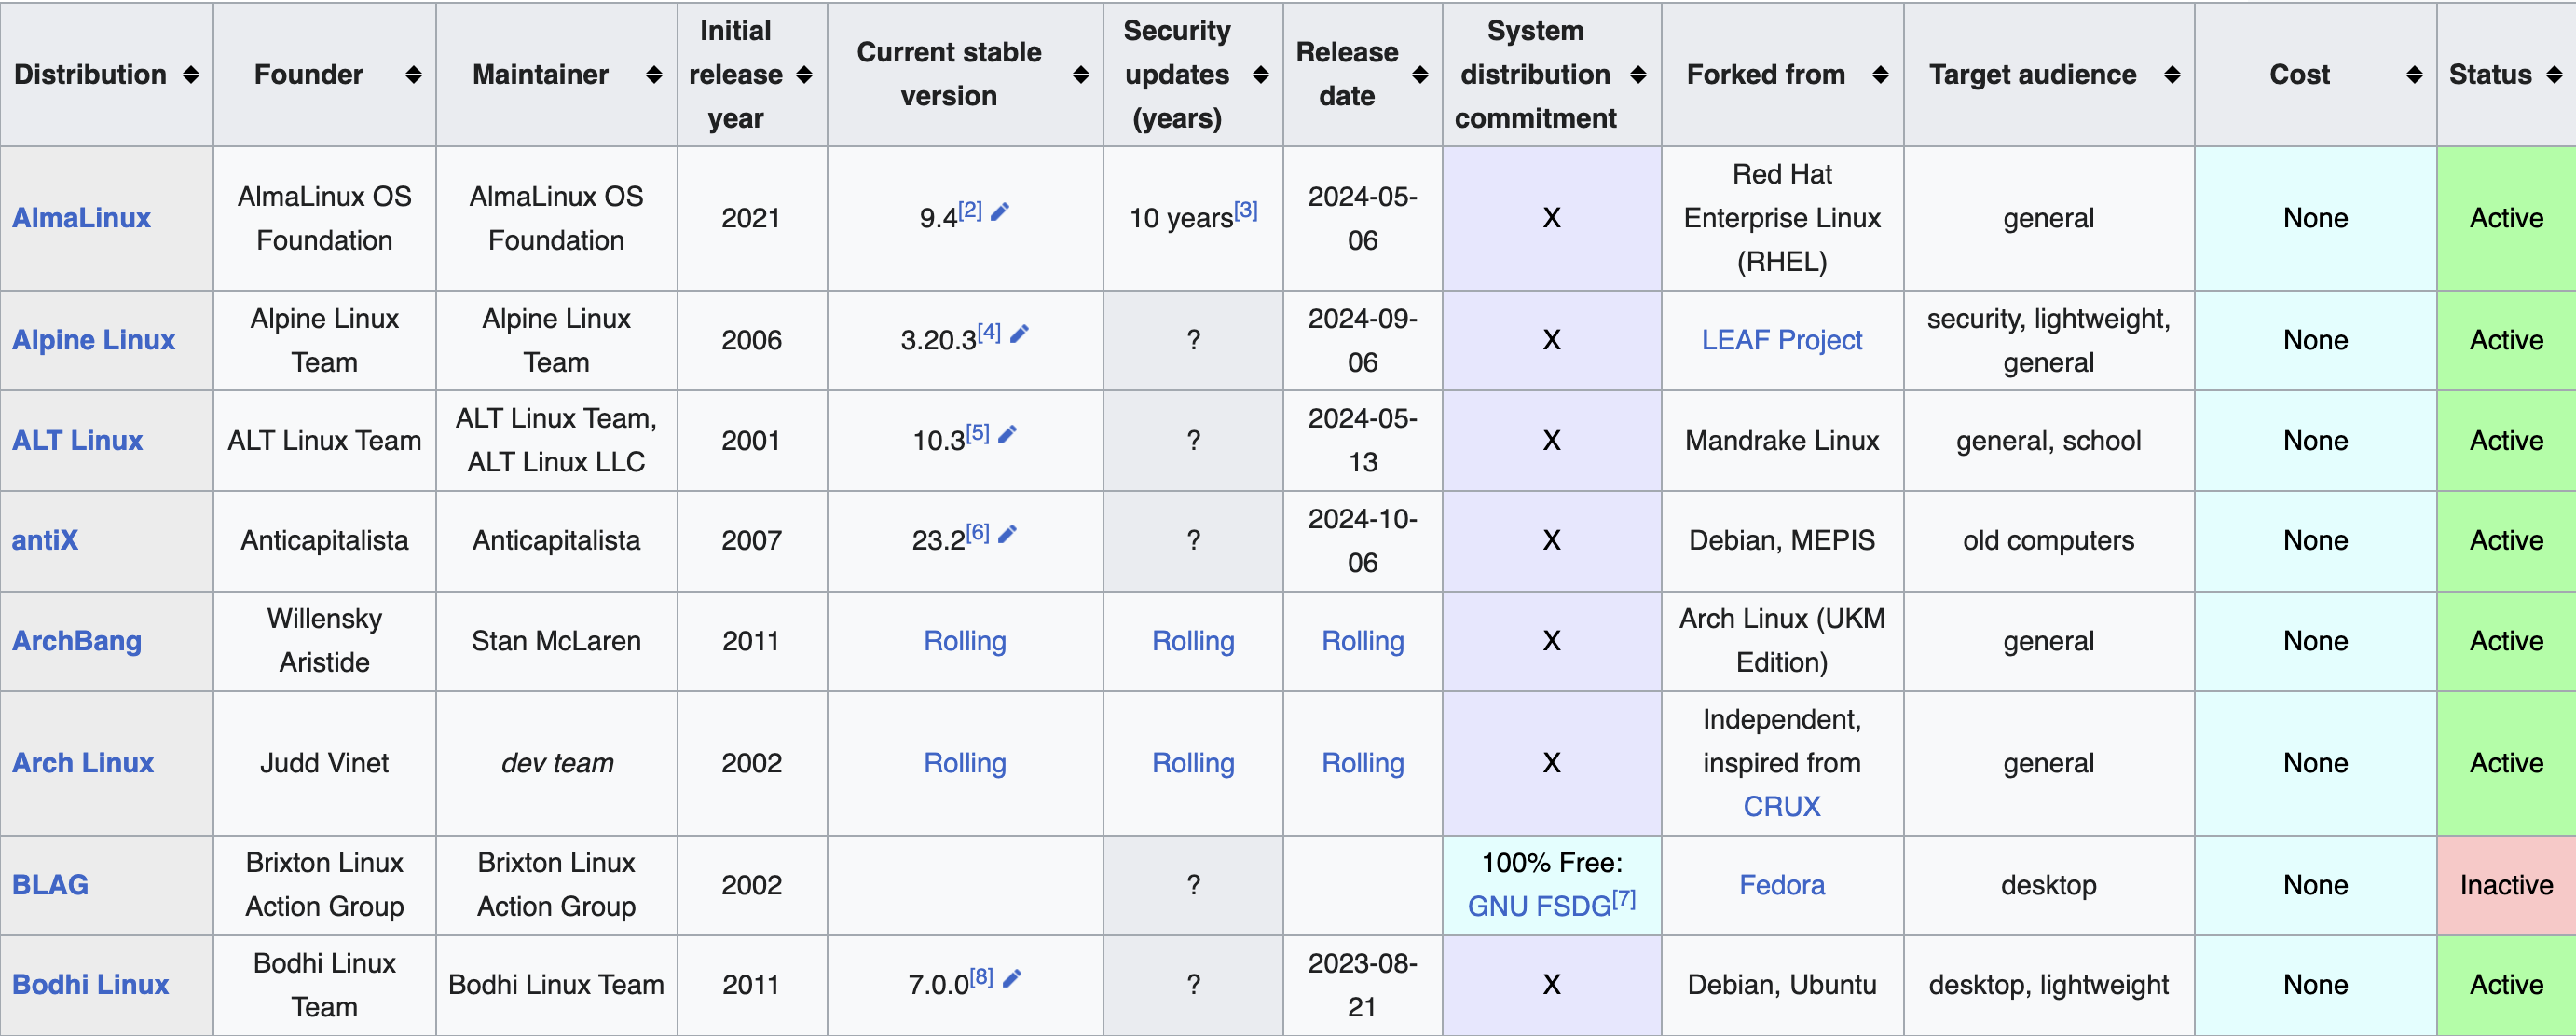

Use the `MechanicalSoup` library to simulate a web browser. Create a browser object and open the URL for the “Comparison of Linux distributions” Wikipedia page: https://en.wikipedia.org/wiki/Comparison_of_Linux_distributions

In [2]:
# Your code here

import mechanicalsoup

browser = mechanicalsoup.StatefulBrowser()  
browser.open("https://en.wikipedia.org/wiki/Comparison_of_Linux_distributions")

print(browser.url)

https://en.wikipedia.org/wiki/Comparison_of_Linux_distributions


### Question 2

We are interested first in extracting data from the ‘Distribution’ column in the table. Use the `find_all` method to select all table headers (`<th>`) that contain the class "`table-rh`". Be careful to not include "\n" in the text. Store the results in a list called `distributions`. 

In [51]:
# Your code here

table = browser.page.select_one('tr')

table_row_name = table.select()





None


In [71]:
page = browser.page

#find the table with the class wikitable
table = page.find('table', {'class': 'wikitable'}) 
rows = table.find_all('tr')

distributions = []
for row in rows:
    distribution = row.find_all("th.table-rh")

    for i in distribution:
        distribution_info = i.find_all("a")
        title = distribution_info.get("title")
        distributions.append(title)

distributions


[]

### Question 3

To retrieve the rest of the columns from the table, use the `find_all` method to extract all table data (`<td>`). Clean the text by removing newlines "\n" and store the results in a list called `columns`.

In [ ]:
# Your code here

### Question 4

Extract all the information from the table and store it in a pandas DataFrame called `df`. The DataFrame should have the following columns: 

```python
column_names = ["Founder", "Maintainer", "Initial_Release_Year", "Current_Stable_Version",
                "Security_Updates", "Release_Date", "System_Distribution_Commitment", 
                "Forked_From", "Target_Audience", "Cost", "Status"]
```

In [86]:
# Your code here

columns = table.find_all('tr')
columns



[<tr>
 <th>Distribution
 </th>
 <th>Founder
 </th>
 <th>Maintainer
 </th>
 <th>Initial release year
 </th>
 <th>Current stable version
 </th>
 <th>Security updates (years)
 </th>
 <th>Release date
 </th>
 <th>System distribution commitment
 </th>
 <th>Forked from
 </th>
 <th>Target audience
 </th>
 <th>Cost
 </th>
 <th>Status
 </th></tr>,
 <tr>
 <th class="table-rh" style="background: #ececec; color: black; font-weight: bold; vertical-align: middle; text-align: left;"><a href="/wiki/AlmaLinux" title="AlmaLinux">AlmaLinux</a>
 </th>
 <td>AlmaLinux OS  Foundation
 </td>
 <td>AlmaLinux OS Foundation
 </td>
 <td>2021
 </td>
 <td>9.4<sup class="reference" id="cite_ref-wikidata-1fd6d2534862129e1464fe662d0c24b98d76a557-v18_2-0"><a href="#cite_note-wikidata-1fd6d2534862129e1464fe662d0c24b98d76a557-v18-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup> <span class="mw-valign-text-top" typeof="mw:File/Frameless"><a href="https://www.wikidata.org/wiki/Q106601457?

### Question 5
Use `SQLite3` to create a new database called `linux_distro.db` (if it doesn’t already exist) and create a table named `linux` with the same columns as your DataFrame. Then, loop through each row of your DataFrame and insert the data into the database. Make sure to commit your changes to permanently save the data to the database, and then close the connection

In [ ]:
# Your code here

### Question 6
Write a SQL query using the extension `%%sql` to:
1. Select all columns from the `linux` table where the `Maintainer` is "dev team".
2. Select distirbutions that have initial release year greater than 2005.
3. Count the number of distributions by each initial release year. Example: 2005: 5, 2006: 3, etc.

In [ ]:
# Your code here for 1)

In [ ]:
# Your code here for 2)

In [ ]:
# Your code here for 3)

***

## Part 2

Objective:

In this problem, you will write a Python code to scrape price data from a vendor, and store it in an SQLite database. Let your imagination fly.  For this question you can use any method other than `mechanicalsoup` that allows you to get the required information as you like!

### Question 1

Suppose that you want to scrape data from the [**Overclockers UK**](https://www.overclockers.co.uk/) website. Overclockers UK sell a wide range of computer components, hardward and gaming systems. As Data Scientist, you are interested in monotoring the price of some products in the platform (Suppose that you work for a similar vendor and you want to measure the market and your competition 🙂). Create a connection to a new sqlite database called `overclokers.db`.

In [ ]:
# Your code here

### Question 2
Create a python function called `get_price_ovcUK` that receives just an `url` as argument. Inside of this function you will create a scraper that will extract the price of a product from the Overclockers UK website. The function should get the following information:
- Current date: Date of the scraping (or when the data was collected)
- Store name: Name of the store (Overclockers UK)
- Product name: Name of the product
- Price: Price of the product
- URL: URL of the product
- Stock: Stock status of the product

For example consider this [product](https://www.overclockers.co.uk/asus-rog-strix-g16-nvidia-rtx-4060-16gb-16.0-wuxga-165hz-intel-i7-13650hx-g-lt-2k6-as.html) from Overclockers UK. The function should scrape the following information:
- Current date: 2022-10-17
- Store name: Overclockers UK
- Product name: ASUS ROG Strix G16 NVIDIA RTX 4060 16GB 16.0" WUXGA 165Hz Intel i7-13650HX Gaming Laptop
- Price: £1,999.99
- URL: https://www.overclockers.co.uk/asus-rog-strix-g16-nvidia-rtx-4060-16gb-16.0-wuxga-165hz-intel-i7-13650hx-g-lt-2k6-as.html
- Stock: In stock

Finally in the same function, you have to insert the data into a table called `products` in the `overclokers.db` database using sqlite3.

In [ ]:
def get_price_ovcUK(url):
    # Initialize the browser ...
    # Go to the URL ...
    # Get the information...
    current_date = ...
    store = ...
    product = ...
    price = ...
    stock = ...
    # save data to database
    connection.execute(...)
    return


***

## Part 3

Objective:

In this problem, you will with the example from class related to dynamic multi-page scraping. You will write a Python code to scrape data from [Scrape this Site](https://www.scrapethissite.com/), store it in an SQLite database, and write some analysis with SQL queries.

### Question 1

Create a connection to a new sqlite database called `nhl.db`. 

In [ ]:
# Your answer here.

### Question 2
Download the whole database on NHL teams stats since 1990 to 2010 from [Hockey Teams: Forms, Searching and Pagination](https://www.scrapethissite.com/pages/forms/) in a panda dataframe. The data is divided into 24 pages. Build from the example in class on how to handle pagination using `mechanicalsoup` and extract the data from all pages. 

Hint: You may need to use a for loop to iterate over all pages. 

Hint 2: You may need to use the `time.sleep()` function to avoid being blocked by the website. Seriouly, don't forget to use it or you will be blocked!

In [ ]:
# Your answer here.

### Question 3
Store the data in a table called `nhl_teams` in the `nhl.db` database using sqlite3.

In [ ]:
# Your answer here.

### Question 4
Write a SQL query using the extension `%%sql` to:

a) Retrieve the Top 5 Teams with the Most Wins in a Single Season.

In [ ]:
# Your answer here.
%%sql

b) Find the Average Goals For (GF) Across All Seasons.

In [ ]:
# Your answer here.
%%sql

c) Identify the Teams with the Best Win Percentage (Win %).

In [ ]:
# Your answer here.
%%sql

d) [Advanced] Find the Most Improved Team in Terms of Wins from One Year to the Next.

Hint: You may need to use a subquery to calculate the difference in wins from one year to the next using a self join. For example you can use the following query to calculate the difference in wins from one year to the next:

```sql
SELECT t1.team, t1.year, t1.wins, t2.wins, t2.wins - t1.wins as diff
FROM nhl_teams t1
JOIN nhl_teams t2
ON t1.team = t2.team AND t1.year = t2.year + 1
```

In [ ]:
# Your answer here.
%%sql

e) [Advanced] Compare the Performance of Teams by Decade in terms of average wins and average goals per decade.

Hint: Since your date comprises from 1990 to 2010, you can create a new column in your table called `decade` and group by this column to calculate the average wins and average goals per decade. You have 2 decades: 1990-1999 and 2000-2010.

In [ ]:
# Your answer here.
%%sql

# <center>Have fun!<a class="tocSkip"></center>